# 6장에서 배울 것들
• 직선이나 평면이 아닌 회귀 함수가 가능한가.

• 데이터의 특징에 따라 분류나 의사결정의 기준을 정할 수 있는가.

• 지금의 딥러닝 이전에 가장 강력한 기계 학습 방법은 어떤 것들이 있었나.

• 다양한 기계 학습 방법들은 어떤 장단점이 있나

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure',               
             'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
          'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']



In [2]:
# preprocessing 서브 모듈의 PolynomialFeatures 클래스를 활용해
# 입력 데이터를 다항 회귀에 사용
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree = 3)
X = poly_feature.fit_transform(X)

Mean squared error: 39.391731479401784


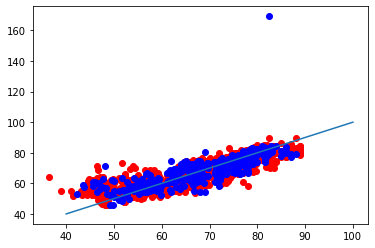

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot([40, 100], [40, 100])
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

In [4]:
# 찾은 회귀 함수가 학습을 수행한 훈련용 데이터에 대해서는 어느 정도 오차를 가지는지 확인 
print('Mean squared error:', mean_squared_error(y_train, y_hat_train))

Mean squared error: 22.875060840714365


In [5]:
# 8차 다항식을 사용하면 이것보다 더 입력의 크기가 매우 커짐
X.shape

(2306, 84)

## LAB 6-1 다항 회귀의 회귀 함수를 그려보자

In [6]:
# 다른 라이브러리들은 위에서 불러왔으므로 생략
import numpy as np

df = pd.read_csv('https://github.com/dknife/ML/raw/main/data/nonlinear.csv')


In [7]:
df.describe()

,x,y
count,1000.000000,1000.000000
mean,0.493986,0.233843
std,0.287668,0.785634
min,0.001947,-2.212464
25%,0.244912,-0.340758
50%,0.485865,0.248391
75%,0.740998,0.819851
max,0.999738,2.424855


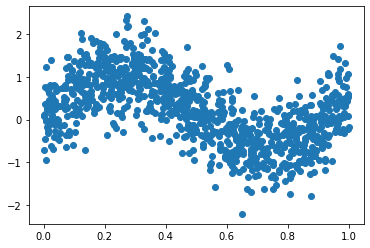

In [8]:
# 시각화
plt.scatter(df['x'], df['y'])

In [9]:
from sklearn.preprocessing import PolynomialFeatures
# to_numpy() 메서드는 pandas 객체를 ndarray(numpy 배열)로 반환함
X = df['x'].to_numpy()
y = df['y'].to_numpy()
# 2차원으로 변형
X = X.reshape(-1,1)     
feature_cubic = PolynomialFeatures(degree = 3)
X_3 = feature_cubic.fit_transform(X)

In [10]:
# 2차원으로 변형
lin_model = LinearRegression()
domain = np.linspace(0, 1, 100).reshape(-1,1)

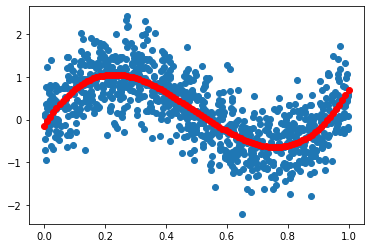

In [11]:
lin_model.fit(X_3, y)
domain_3 = feature_cubic.fit_transform(domain)
predictions = lin_model.predict(domain_3)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, predictions, color='r') # line color를 빨간색으로 설정

## 사이킷런의 결정 트리로 붓꽃 분류하기

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target

dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris.dot"),
  feature_names=iris.feature_names,
)



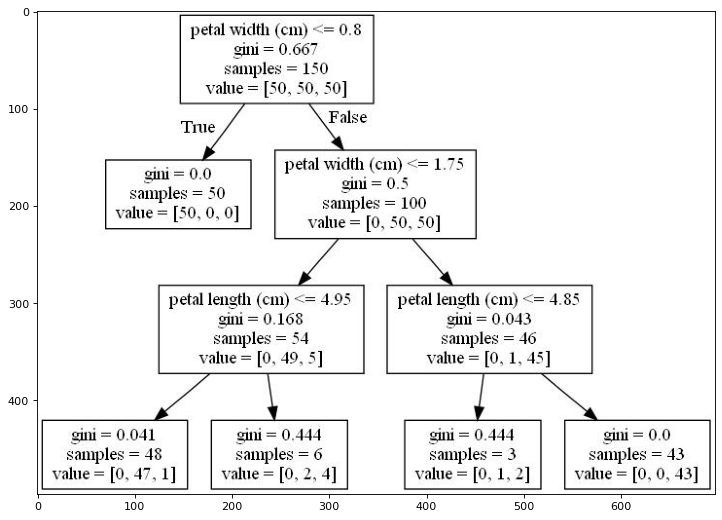

In [14]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
          facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

## LAB 6-2 꽃받침의 너비와 길이로 결정트리를 만들자
- 붓꽃 데이터를 그대로 사용하여 결정 트리를 만들었더니, 꽃잎의 길이와 너비만이 분류 기준으로 사용되고 있다. 꽃받침의 너비와 길이만 가지고 결정 트리를 만들어 보고, 전체 속성을 사용했을 때 왜 이 기준이 선택되지 않았는지 생각해보자.

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data[:,:2], iris.target
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris2.dot"),
  feature_names=iris.feature_names[:2],
)

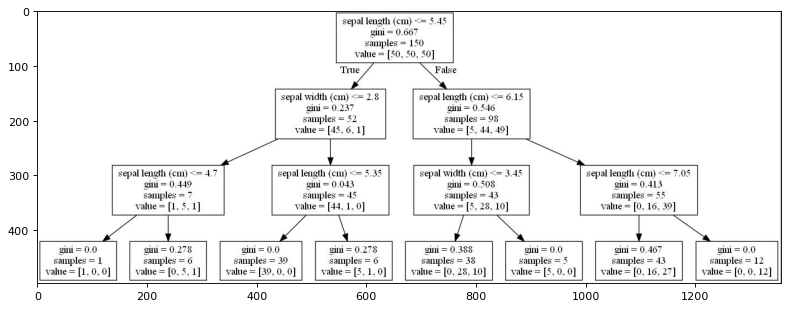

In [17]:
!dot -Tjpg dec_tree_for_iris2.dot -o dec_tree_for_iris2.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris2.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
          facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

## LAB 6-3 엔트로피를 이용하여 결정 트리 만들기
- CART 알고리즘은 노드를 분할할 때 지니 불순도에 기반한 비용함수 뿐만 아니라 엔트로피를 이용한 비용함수를 사용할 수 있다고 하였다. 엔트로피를 사용하고, 모든 속성을 다 썼을 때에 어떤 결정 트리가 생성되는지 확인해 보자.

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data, iris.target
dec_tree = DecisionTreeClassifier(max_depth=3, criterion = 'entropy')
dec_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris3.dot"),
  feature_names=iris.feature_names,
)

In [20]:
!dot -Tjpg dec_tree_for_iris3.dot -o dec_tree_for_iris3.jpg


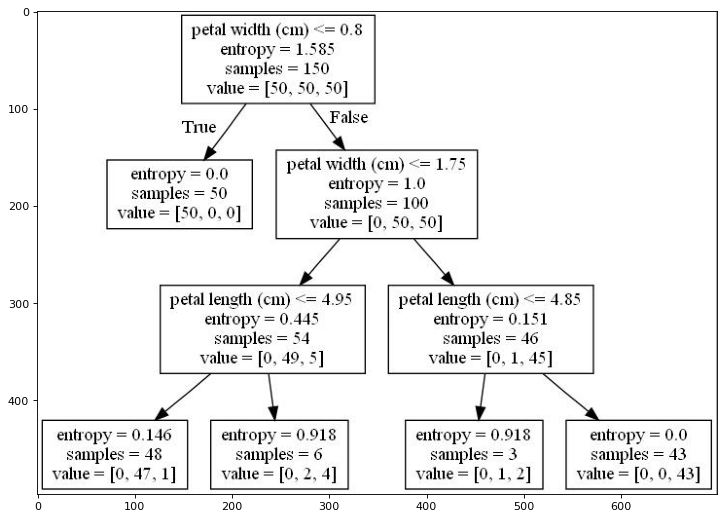

In [21]:
dec_tree_img = plt.imread('./dec_tree_for_iris3.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
          facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

## 사이킷런을 이용한 서포트 벡터 머신 사용하기

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://github.com/dknife/ML/raw/main/data/two_classes.csv')

In [23]:
df.tail(5)

,x1,x2,y
995,2.664896,-1.955326,0
996,-2.019928,0.334542,1
997,-4.634470,0.300158,1
998,1.426275,-2.765590,0
999,1.988053,1.466494,0


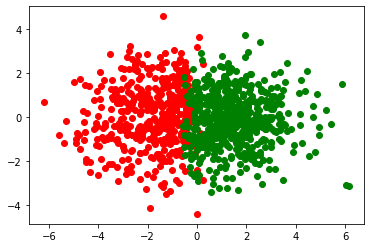

In [24]:
df_positive = df[df['y']>0]     # y가 1인 데이터만 추출
df_negative = df[df['y']==0]    # y가 0인 데이터만 추출
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [25]:
# warning 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

In [26]:
# 슬랙 변수 최적화의 가중치가 될 C 키워드 매개변수를 지정하고, 손실 함수를 loss 키워드 매개변수에 지정
from sklearn.svm import LinearSVC
X = df[['x1', 'x2']].to_numpy()           # x1, x2를 입력 벡터로 한다
y = df['y']                               # y열의 값이 레이블 
svm_simple = LinearSVC(C=1, loss='hinge') # SVM 클래스 생성
svm_simple.fit(X, y)                      # 입력과 레이블로 SVM 학습 실시

LinearSVC(C=1, loss='hinge')

In [27]:
# predict() 함수를 이용하여 입력을 넣고, 레이블을 예측
svm_simple.predict([[0.12, 0.56], [-4, 40],  [0, 40], [5,20]])

array([0, 1, 1, 0], dtype=int64)

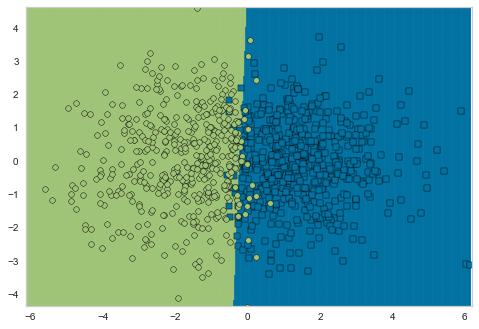

In [29]:
# 학습된 svm_simple로 DecisionViz 클래스를 만들고 fit()과 draw()를 차례로 불러 SVM 분류기의 분리 경계를 확인
from yellowbrick.contrib.classifier import DecisionViz
viz = DecisionViz(svm_simple, title="linear SVM")
viz.fit(X, y)
viz.draw(X, y)

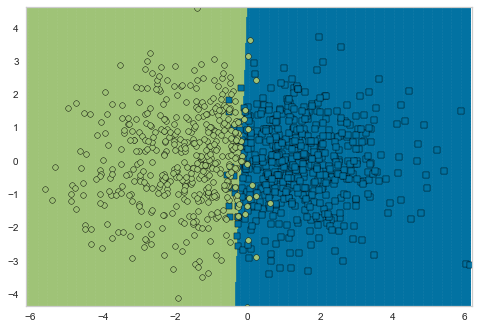

In [31]:
# 데이터 정제를 포함한 학습모델을 만들기 위해 사용했던 파이프라인에 입력 데이터의 다항 특징 변환을 포함하는 것
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_std = Pipeline([                       # 파이프라인으로 SVM 객체 구성
  ("std", StandardScaler()),               # 데이터 표준화 단계 포함
  ("lsvm", LinearSVC(C=1, loss='hinge')),  # 선형 SVM 분류기 포함
])
svm_std.fit(X, y)
viz = DecisionViz(svm_std, title="Standardization - SVM")
viz.fit(X, y)
viz.draw(X, y)

## LAB 6-4 비선형 SVM을 이용한 데이터 분류

In [34]:
df = pd.read_csv('https://github.com/dknife/ML/raw/main/data/twisted_data.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


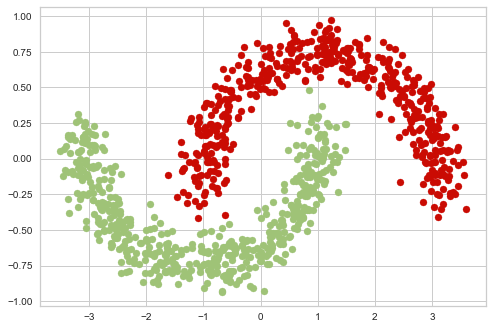

In [36]:
df_positive = df[df['y']>0] # df['y']가 0 보다 클 경우 df_positive
df_negative = df[df['y']==0] # df['y']가 0 과 같을 경우 df_nagative
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [37]:
X = df[['x1', 'x2']].to_numpy()
y = df['y']

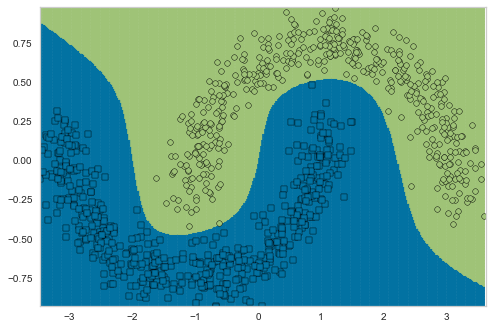

In [51]:
polynomial_svm_clf = Pipeline([
   ("scaler", StandardScaler()),
   ("poly_features", PolynomialFeatures(degree=10)),
   ("svm_clf", LinearSVC(C=1, loss="squared_hinge"))
])
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title="polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)

## LAB 6-5 커널 트릭을 이용한 비선형 SVM

- 전에 중복된 데이터들과 라이브러리는 생략했습니다.

In [39]:
from sklearn.svm import SVC

X = df[['x1', 'x2']].to_numpy()
y = df['y']

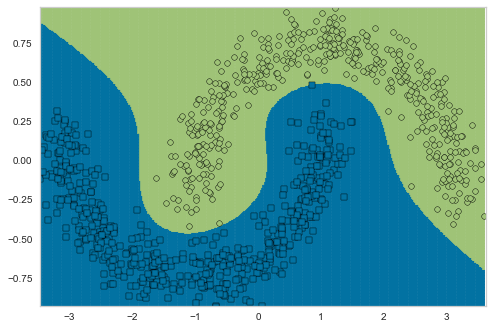

In [54]:
polynomial_svm_clf = Pipeline([
   ("scaler", StandardScaler()),
   ("svm_clf", SVC(C=10, kernel = 'poly', degree = 4, coef0=2))
]) # PolynomialFeatures 사용 x, kernel은 'poly'로 자정하였음 (linear도 가능)
polynomial_svm_clf.fit(X, y)
viz = DecisionViz(polynomial_svm_clf, title="polynomial feature SVM")
viz.fit(X, y)
viz.draw(X, y)

# SVM은 과적합이 되는 경우나 오류 데이터 영향이 적다는 장점이 있지만 학습 속도가 느리고 해석이 어려운 것 같습니다.